<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/Hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Phan biet hoa

/content/gdrive/MyDrive/Colab Notebooks/Phan biet hoa


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Phan biet hoa/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 510 images belonging to 5 classes.


In [ ]:
  validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Phan biet hoa/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 50 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
validation.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation)

Epoch 1/500
16/16 [==============================] - 252s 15s/step - loss: 6.2390 - accuracy: 0.2353 - val_loss: 1.5816 - val_accuracy: 0.2800
Epoch 2/500
16/16 [==============================] - 5s 310ms/step - loss: 1.5609 - accuracy: 0.3118 - val_loss: 1.5870 - val_accuracy: 0.2000
Epoch 3/500
16/16 [==============================] - 5s 315ms/step - loss: 1.4915 - accuracy: 0.3078 - val_loss: 1.6055 - val_accuracy: 0.2200
Epoch 4/500
16/16 [==============================] - 5s 313ms/step - loss: 1.3864 - accuracy: 0.4000 - val_loss: 1.5337 - val_accuracy: 0.2400
Epoch 5/500
16/16 [==============================] - 7s 464ms/step - loss: 1.3707 - accuracy: 0.4392 - val_loss: 1.3511 - val_accuracy: 0.4000
Epoch 6/500
16/16 [==============================] - 5s 313ms/step - loss: 1.2523 - accuracy: 0.4314 - val_loss: 1.0914 - val_accuracy: 0.5400
Epoch 7/500
16/16 [==============================] - 5s 310ms/step - loss: 1.1362 - accuracy: 0.5588 - val_loss: 0.9718 - val_accuracy: 0.5800

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0006960626342333853
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

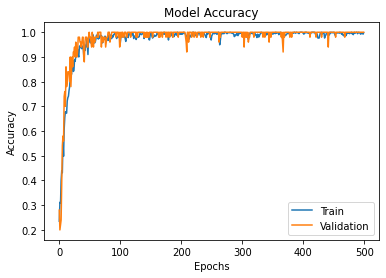

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save('Hoa.h5')

In [ ]:
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 30ms/step
Hoa cuc


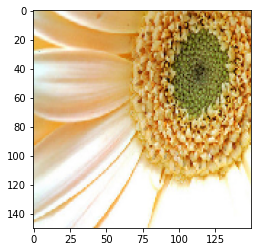

1/1 [==============================] - 0s 24ms/step
Hoa cuc


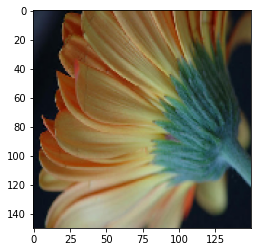

1/1 [==============================] - 0s 15ms/step
Hoa hong


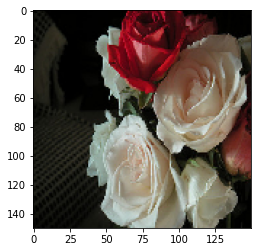

1/1 [==============================] - 0s 16ms/step
Hoa bo cau anh


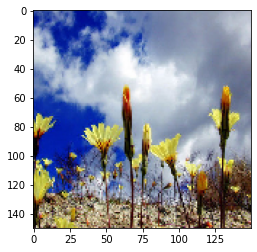

1/1 [==============================] - 0s 15ms/step
Hoa bo cau anh


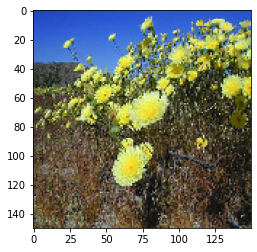

1/1 [==============================] - 0s 15ms/step
Hoa hong


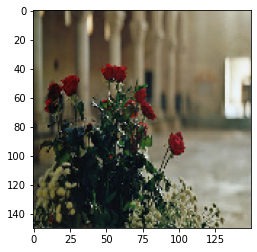

1/1 [==============================] - 0s 15ms/step
Hoa Huong duong


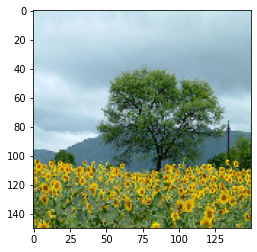

1/1 [==============================] - 0s 17ms/step
Hoa Huong duong


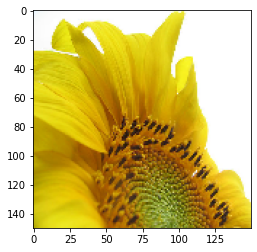

1/1 [==============================] - 0s 15ms/step
Hoa Huong duong


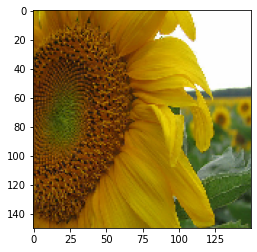

1/1 [==============================] - 0s 16ms/step
Hoa tulip


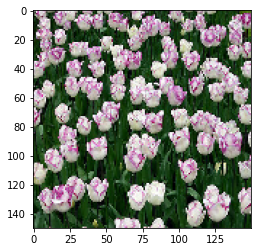

1/1 [==============================] - 0s 19ms/step
Hoa tulip


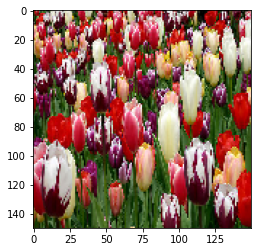

In [ ]:
test="/content/gdrive/MyDrive/Colab Notebooks/Phan biet hoa/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model.predict(img)
  if round(result[0][0])==1:
    prediction='Hoa cuc'
  if round(result[0][1])==1:
    prediction='Hoa bo cau anh'
  if round(result[0][2])==1:
    prediction='Hoa hong'
  if round(result[0][3])==1:
    prediction='Hoa Huong duong'
  if round(result[0][4])==1:
    prediction='Hoa tulip'    
  print(prediction)
  plt.show()